In [86]:
# import all the packages
import scipy.integrate
import numpy
import matplotlib.pyplot as plt
import math
import pandas as pd

In [87]:
#equations that determine SIR model:
def SIR_model(y, t, r, a):
    S, I, R = y
    
    ds_dt = -r*S*I
    di_dt =  r*S*I - a*I
    dr_dt = a*I
    return([ds_dt, di_dt, dr_dt])

In [88]:
#total population : N
N = 39000000.0
# S0 and I0 are number of susceptibles and infectives at t=0 (02_march_2020 for Telangana state)
S0 = 38999999.0
I0 = 1.0
R0 = 0.0

In [89]:
#First step : determine the average values of rho, alpha, phi, a, r and construct SIR model using them
rho_avg = 13918473.66
alpha_avg = 1.8020031503308
phi_avg = 8.64544
a_avg = 0.176019
r_avg = 1.264e-08

#timeline on x-axis
t = numpy.linspace(0, 200, 200)

#Integrating the SIR model differential equations
solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(r_avg, a_avg))
solution_avg = numpy.array(solution)

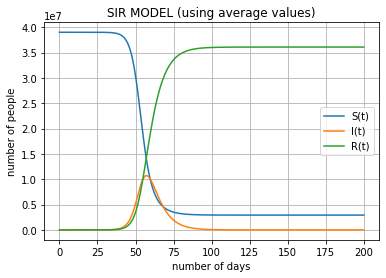

Reproduction rate,Ro = 2.8020313112407758 
Average infection time,1/a = 5.6812048699288145
Maximum number of infectives: 10731719.208363807
Time location of maximum number of infectives: 57 days
Maximum number of recovered is 36076087.53521798
Duration of epidemic is 179 days.


In [90]:
#plotting graph for the obtained solution

plt.figure(figsize=[6,4])
plt.title("SIR MODEL (using average values)")
plt.plot(t, solution_avg[:, 0], label="S(t)")
plt.plot(t, solution_avg[:, 1], label="I(t)")
plt.plot(t, solution_avg[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("number of days")
plt.ylabel("number of people")
plt.show()

#Basic reproduction rate,Ro
Ro = S0/rho_avg
#average infection time,1/a
It = 1/a_avg

print("Reproduction rate,Ro =",Ro,"\nAverage infection time,1/a =",It)
print("Maximum number of infectives:",max(solution_avg[:,1]))

#to find time location of maximum number of infectives
for i in range(0,70):
    if solution_avg[i,1] == max(solution_avg[:,1]):
        print("Time location of maximum number of infectives:",i,"days")
        break

#to find duration of the epidemic and total number of recovered     
for i in range (75,200):
    if solution_avg[i,1] <= 1:
        print("Maximum number of recovered is",solution_avg[i,2])
        print("Duration of epidemic is",i,"days.")
        break

In [91]:
#error calculation
corona = pd.read_csv(r"C:\Users\korra\OneDrive\Desktop\corona_data.txt", sep ='\t')
i_d = corona["I"].values
r_d = corona["R"].values
i_avg = solution_avg[0:115,1]
r_avg = solution_avg[0:115,2]
i_e_avg = numpy.subtract(i_avg , i_d)
r_e_avg = numpy.subtract(r_avg, r_d)
print("Error occured in observed and predicted I(t) values:",numpy.sqrt(((i_e_avg)**2).mean()))
print("Error occured in observed and predicted R(t) values:",numpy.sqrt(((r_e_avg)**2).mean()))

Error occured in observed and predicted I(t) values: 3532096.080788228
Error occured in observed and predicted R(t) values: 23639380.9795963


Text(0, 0.5, 'number of people')

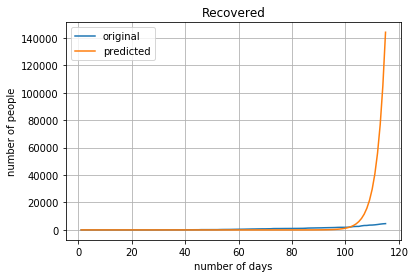

In [92]:
#curve fitting to obatin values of constants using recovered data
x = pd.read_csv(r"C:\Users\korra\OneDrive\Desktop\corona_data.txt", sep ='\t')
So = 38999999
#function to calculate R(t)
def recovered(t,rho,alpha,phi,a):
    return (rho**2/So)*((So/rho - 1) + alpha*math.tanh(a*alpha*t/2 - phi))
f=numpy.vectorize(recovered)

#average values of parameters
avg = [13918473, 1.802031503308, 6.64544, 0.176019]

#the value of phi is changed so as to get a curve that overlaps with the actual curve
g = [13918473, 1.802031503308, 20.64544, 0.176019]

n = len(x["Time"])
z = numpy.empty(n)
for i in range(n):
    z[i] = recovered(x["Time"][i],g[0],g[1],g[2],g[3])

#plotting the curve
plt.title("Recovered")
plt.plot(x["Time"], x["R"], label = "original")
plt.plot(x["Time"], z ,label = "predicted")
plt.legend()
plt.grid()
plt.xlabel("number of days")
plt.ylabel("number of people")

In [93]:
#curve fitting
#determine the values of parameters that minimise the error between model prediction and measured values

from scipy.optimize import curve_fit
u = x["Time"].values
r = x["R"].values
c = curve_fit(f, u, r, g)[0]
print(c)


[1.42467896e+07 1.73746639e+00 6.58613603e+00 2.42694435e-02]


Text(0, 0.5, 'number of people')

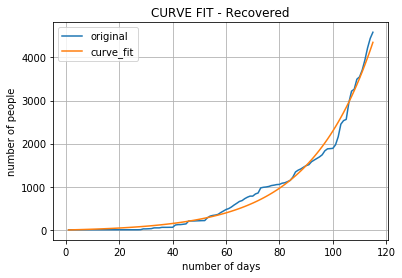

In [94]:
# a plot for the actual data and the curve_fit 
for i in range(n):
    z[i] = recovered(x["Time"][i],c[0],c[1],c[2],c[3])

plt.title("CURVE FIT - Recovered")
plt.plot(x["Time"], x["R"], label = "original")
plt.plot(x["Time"], z ,label = "curve_fit")
plt.legend()
plt.grid()
plt.xlabel("number of days")
plt.ylabel("number of people")

In [95]:
#Second step : use the values of rho, alpha, phi, a, r  obtained through curve fit and construct SIR model using them
rho_cf = 1.42467896e+07
alpha_cf = 1.73746639e+00
phi_cf = 6.58613603e+00
a_cf = 2.42694435e-02
r_cf = 1.7035026263e-09

#timeline on x-axis
t = numpy.linspace(0, 2000, 2000)

#Integrating the SIR model differential equations
solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(r_cf, a_cf))
solution_cf = numpy.array(solution)

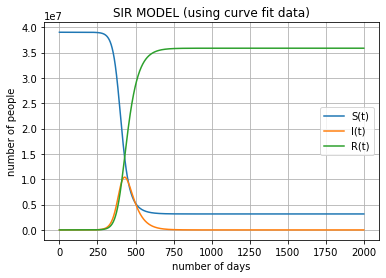

Reproduction rate,Ro = 2.7374587605336713 
Average infection time,1/a = 41.20407622861233
Maximum number of infectives: 10405816.738837522
Time location of maximum number of infectives: 428 days
Maximum number of recovered is 35850796.160821505
Duration of epidemic is 1327 days.


In [96]:
#plotting graph for the obtained solution

plt.figure(figsize=[6,4])
plt.title("SIR MODEL (using curve fit data)")
plt.plot(t, solution_cf[:, 0], label="S(t)")
plt.plot(t, solution_cf[:, 1], label="I(t)")
plt.plot(t, solution_cf[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("number of days")
plt.ylabel("number of people")
plt.show()

#Basic reproduction rate,Ro
Ro = S0/rho_cf
#average infection time,1/a
It = 1/a_cf

print("Reproduction rate,Ro =",Ro,"\nAverage infection time,1/a =",It)
print("Maximum number of infectives:",max(solution_cf[:,1]))

#to find time location of maximum number of infectives
for i in range(0,600):
    if solution_cf[i,1] == max(solution_cf[:,1]):
        print("Time location of maximum number of infectives:",i,"days")
        break

#to find duration of the epidemic and total number of recovered     
for i in range (600,2000):
    if solution_cf[i,1] <= 1:
        print("Maximum number of recovered is",solution_cf[i,2])
        print("Duration of epidemic is",i,"days.")
        break

In [97]:
#error calculation
corona = pd.read_csv(r"C:\Users\korra\OneDrive\Desktop\corona_data.txt", sep ='\t')
i_d = corona["I"].values
r_d = corona["R"].values
i_cf = solution_cf[0:115,1]
r_cf = solution_cf[0:115,2]
i_e_cf = numpy.subtract(i_cf , i_d)
r_e_cf = numpy.subtract(r_cf, r_d)
print("Error occured in observed and predicted I(t) values:",numpy.sqrt(((i_e_cf)**2).mean()))
print("Error occured in observed and predicted R(t) values:",numpy.sqrt(((r_e_cf)**2).mean()))

Error occured in observed and predicted I(t) values: 1294.5838748974902
Error occured in observed and predicted R(t) values: 1397.8433604452723


In [98]:
#Third step : find the values of a,r by trying to fit data to SIR model and construct SIR model using them
rho_f = 1.87642485040e+07
alpha_f = 1.79296644
phi_f = 6.06904542e+00
a_f = 7.07132571e-02
r_f = 3.768509945111835e-09

#timeline on x-axis
t = numpy.linspace(0, 1000, 1000)

#Integrating the SIR model differential equations
solution = scipy.integrate.odeint(SIR_model, [S0, I0, R0], t, args=(r_f, a_f))
solution_f = numpy.array(solution)

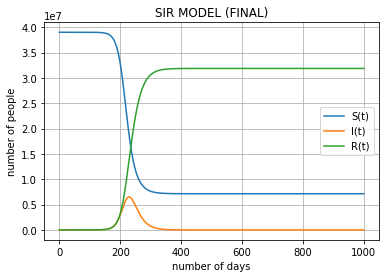

Reproduction rate,Ro = 2.078420512907102 
Average infection time,1/a = 14.141619846273494
Maximum number of infectives: 6506614.305298221
Time location of maximum number of infectives: 229 days
Maximum number of recovered is 31860700.13293012
Duration of epidemic is 610 days.


In [99]:
#plotting graph for the obtained solution

plt.figure(figsize=[6,4])
plt.title("SIR MODEL (FINAL)")
plt.plot(t, solution_f[:, 0], label="S(t)")
plt.plot(t, solution_f[:, 1], label="I(t)")
plt.plot(t, solution_f[:, 2], label="R(t)")
plt.grid()
plt.legend()
plt.xlabel("number of days")
plt.ylabel("number of people")
plt.show()

#Basic reproduction rate,Ro
Ro = S0/rho_f
#average infection time,1/a
It = 1/a_f


print("Reproduction rate,Ro =",Ro,"\nAverage infection time,1/a =",It)
print("Maximum number of infectives:",max(solution_f[:,1]))

#to find time location of maximum number of infectives
for i in range(0,400):
    if solution_f[i,1] == max(solution_f[:,1]):
        print("Time location of maximum number of infectives:",i,"days")
        break
#to find duration of the epidemic and total number of recovered     
for i in range (400,1000):
    if solution[i,1] <= 1:
        print("Maximum number of recovered is",solution_f[i,2])
        print("Duration of epidemic is",i,"days.")
        break

In [100]:
#error calculation
corona = pd.read_csv(r"C:\Users\korra\OneDrive\Desktop\corona_data.txt", sep ='\t')
i_d = corona["I"].values
r_d = corona["R"].values
i_f = solution_f[0:115,1]
r_f = solution_f[0:115,2]
i_e_f = numpy.subtract(i_f , i_d)
r_e_f = numpy.subtract(r_f, r_d)
print("Error occured in observed and predicted I(t) values:",numpy.sqrt(((i_e_f)**2).mean()))
print("Error occured in observed and predicted R(t) values:",numpy.sqrt(((r_e_f)**2).mean()))

Error occured in observed and predicted I(t) values: 393.5777740279937
Error occured in observed and predicted R(t) values: 394.9774450853022


(0.0, 40000000)

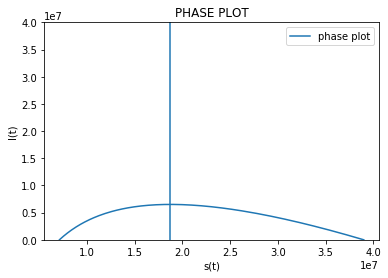

In [101]:
#phase plot
plt.title("PHASE PLOT")
plt.plot(solution_f[:, 0], solution_f[:, 1], label ="phase plot")
plt.axvline(rho_f)
plt.legend()
plt.xlabel("s(t)")
plt.ylabel("I(t)")
plt.ylim(0.0, 40000000)

Text(0, 0.5, 'number of people')

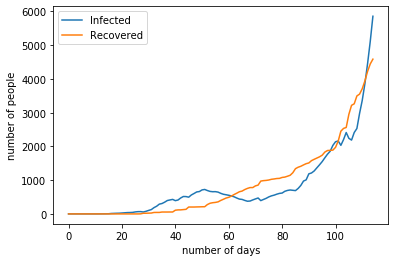

In [102]:
#plots for observed data

data = pd.read_csv(r"C:\Users\korra\OneDrive\Desktop\corona_data.txt", sep ='\t')
plt.figure(figsize=[6,4])
data.I.plot(label="Infected")
data.R.plot(label="Recovered")
plt.legend()
#corona.S.plot()
plt.grid()
plt.grid()
plt.legend()
plt.xlabel("number of days")
plt.ylabel("number of people")
